In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt
from graph_degree import in_degree_distribution, compute_in_degrees

In [12]:
# data structure {node: set([directed nodes...])}
# read in the data
response = open('data/alg_phys-cite.txt')
digraph = {}
for line in response:
    cit_lst = [int(item) for item in line.split()]
    artical = cit_lst[0]
    citations = cit_lst[1:]
    digraph[artical] = digraph.get(artical, set()).union(citations)

# calcualte in degree for each node, then a PMF distribution
ind_digraph = compute_in_degrees(digraph)
ind_dist = pd.Series(ind_digraph).value_counts(normalize=True).sort_index()

print 'Number of nodes', len(ind_digraph)
print 'Mean in-degree = {:.2f}'.format(pd.Series(ind_digraph).mean())
print 'Mean in-degree {:.4f}%'.format(pd.Series(ind_digraph).mean() / len(ind_digraph) * 100)

Number of nodes 27770
Mean in-degree = 12.70
Mean in-degree 0.0457%


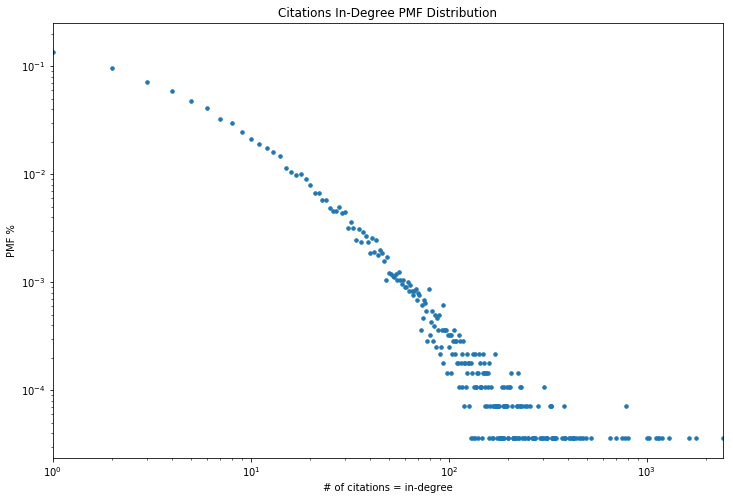

In [4]:
# plotting the PMF in degree distribution on a loglog scale
ax = ind_dist.plot(loglog=True, figsize=(12,8), marker='.', markersize=7, linestyle='')
plt.title('Citations In-Degree PMF Distribution')
plt.xlabel('# of citations = in-degree')
plt.ylabel('PMF %')

plt.show()

Q2.1: Yes, the expected value for each node generated by ER algorithm is the same. Each node is choosing among n-1 possibilities at the probability of p. Thus, binomial distribution determines the expected value with a mean at (n-1)p.

Q2.2: The in-degree distribution of ER graph should look closer to a normal distribution with a bell-shape in the continuous sense or a binomial distribution in a discrete sense, as each node can be considered as an iid trail.

Q2.3: No, the two shapes are different. For the citations graph, the number of in-degree decreases exponentially while reaching a larger number on a PMF graph. It closely represents more an exponential distribution. In contrast, in the ER graph, the number of in-degree forms a bell-shaped curve around the mean. Also, the ER graph does not present many extremely high citation cases.

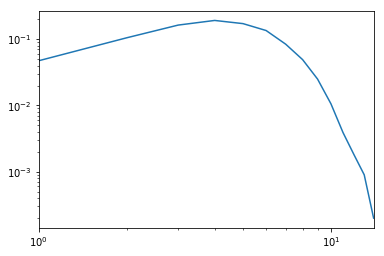

In [8]:
from graph_gen import algo_er

g = algo_er(10000, 0.000457)
pd.Series(compute_in_degrees(g)).value_counts(normalize=True).sort_index().plot(loglog=True)

In [9]:
import math
from graph_gen import algo_dpa

tot_nodes = int(len(ind_digraph))
avg_outdeg = int(math.ceil(pd.Series(ind_digraph).mean()))
dpa_graph = algo_dpa(tot_nodes, avg_outdeg)

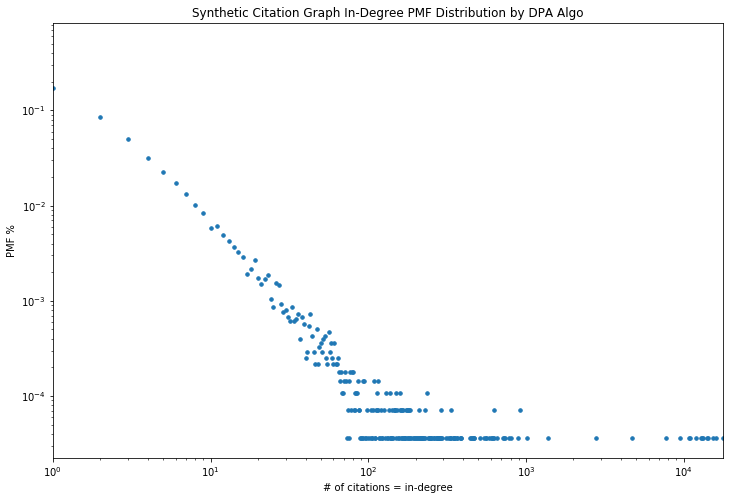

In [10]:
pd.Series(compute_in_degrees(dpa_graph)) \
    .value_counts(normalize=True) \
    .sort_index() \
    .plot(loglog=True, figsize=(12,8), marker='.', markersize=7, linestyle='')

plt.title('Synthetic Citation Graph In-Degree PMF Distribution by DPA Algo')
plt.xlabel('# of citations = in-degree')
plt.ylabel('PMF %')

plt.show()

Q5.1: Both plots are pretty similar with a few variations. Both demonstrate cases where the number of citations is exceptionally high. Both show that papers with a low number of citations dominate the population. Although the DPA graph forms a straight down slop line, the reality is not a perfectly straight line.

Q5.2: "Rich get richer" best demonstrates the phenomenon here in the DPA case, also called the Power Law. In simple terms, plots under log-log plot shows a downward straight line exhibit the behavior of the power law, where ln[f(k)] = -c ln(k) + ln(a).

Q5.3: For the actual physics citation, it exhibits the "Rich get richer" phenomenon. However, the log-log plot is not a perfectly straight line and has a hump around 10^1 citations area indicate a local cluster. Therefore, in reality, popular papers do get extremely super "in-degree" citations, standard papers do also get attention. 
